# Analysis of All Space Missions from 1957

### Content

 1. Introduction: All Space Missions fron 1957
 2. Data description
 3. Research questions
 4. Data preparation: cleaning and shaping
 5. EDA and Visualisation

## 1. Introduction:  All Space Missions from 1957

Space exploration is the use of astronomy and space technology to explore outer space. While the exploration of space is carried out mainly by astronomers with telescopes, its physical exploration though is conducted both by unmanned robotic space probes and human spaceflight. Space exploration, like its classical form astronomy, is one of the main sources for space science.

While the observation of objects in space, known as astronomy, predates reliable recorded history, it was the development of large and relatively efficient rockets during the mid-twentieth century that allowed physical space exploration to become a reality. Common rationales for exploring space include advancing scientific research, national prestige, uniting different nations, ensuring the future survival of humanity, and developing military and strategic advantages against other countries

 Source (https://en.wikipedia.org/wiki/Space_exploration)

## 2. Data description

My based on the space missions in period 1957-2017 
 Below the data that will be used in analysis:
+ Company-company name
+ Location-Location of the Launch
+ Date-Date of launch
+ Detail-rocket name
+ Status Rocket-Status of the rocket
+ Rocket-Cost of the mission: in dollar million
+ Status mission-Status of the mission



## 3. Research questions

In this project, mainly I will focus on several parts of data analysis and visualization:
1. Analyze success of the space missions
2. Analyze cost of mission and its influence on result
3. Analyze Location of launch to success of mission 
4. Analyze rocket status
5. Analyze failure rate in different company

## 4. Data preparation: cleaning and shaping

At this part, I have almost ready dataset but I should make some operations with them:
 * Replace invalid values by NaN
 * check for the inconsistencies
 * drop columns that will not be used

In [110]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [111]:
#read dataset check for duplicates and delete nulls
df = pd.read_csv("Space_Corrected.csv")
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool
0


In [112]:
#drop rows that habe null values and reset indexing
df = df.dropna(axis=1)
df = df.reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7   Status Mission  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB
None


In [137]:
df['DateTime'] = pd.to_datetime(df['Datum'])

# Extract the launch year
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)
# Extract the country of launch

df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

df.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,DateTime,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,2020-08-07 05:12:00+00:00,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,2020-08-06 04:01:00+00:00,2020,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success,2020-08-04 23:57:00+00:00,2020,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success,2020-07-30 11:50:00+00:00,2020,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,Success,2020-07-25 03:13:00+00:00,2020,China
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,Success,2020-07-23 14:26:00+00:00,2020,Kazakhstan
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,Success,2020-07-23 04:41:00+00:00,2020,China
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,Success,2020-07-20 21:30:00+00:00,2020,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,Success,2020-07-19 21:58:00+00:00,2020,Japan


  ## 5.EDA and Visualisation

## 5.1 Analyze success of the space missions

Pie chart visualisation of percentage of failure/success

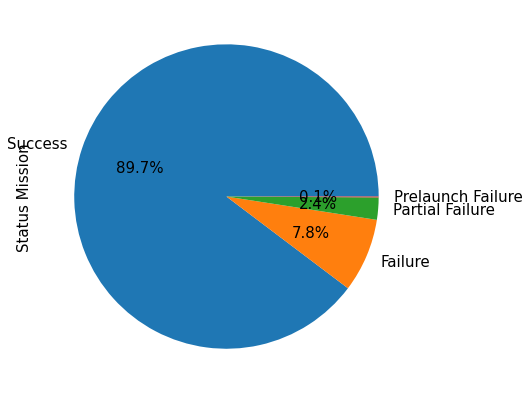

In [174]:
plt.rcParams['font.size'] = 15.0
df['Status Mission'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(7,7))

## 5.5 Analyze failure rate in different company

Top 15 companies repsesented by using barplot

In [184]:
df['Company Name'].value_counts()[:15]

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Name: Company Name, dtype: int64

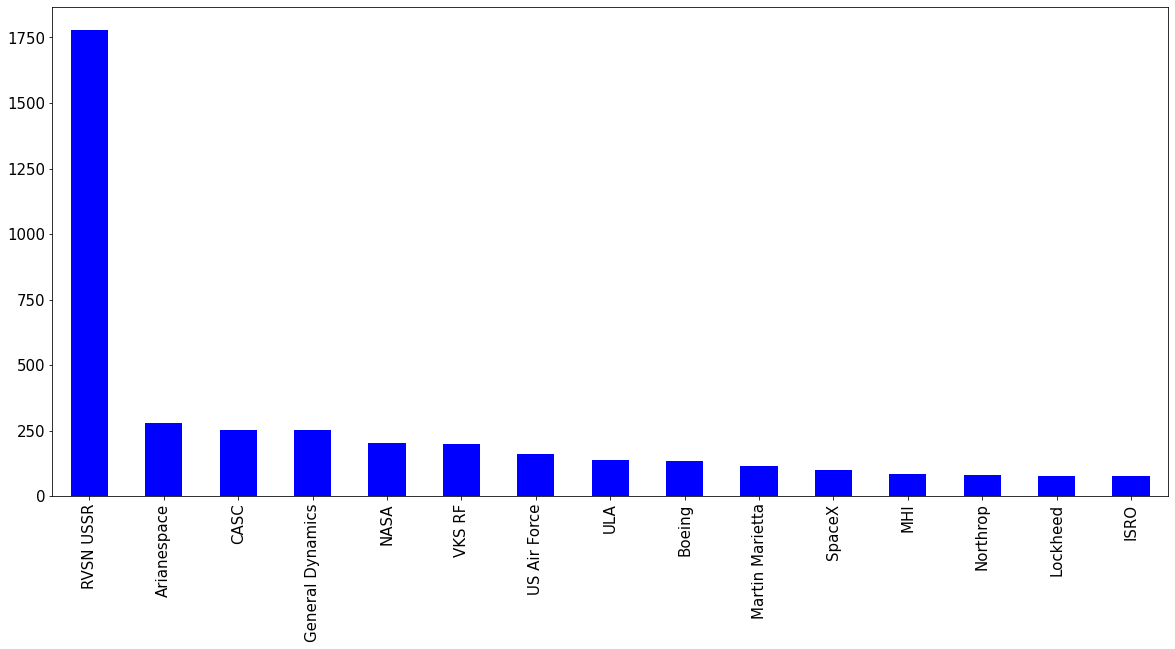

In [185]:
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
df['Company Name'].value_counts()[:15].plot(kind='bar',color='blue')

barplot that show relation between Company and the result of mission

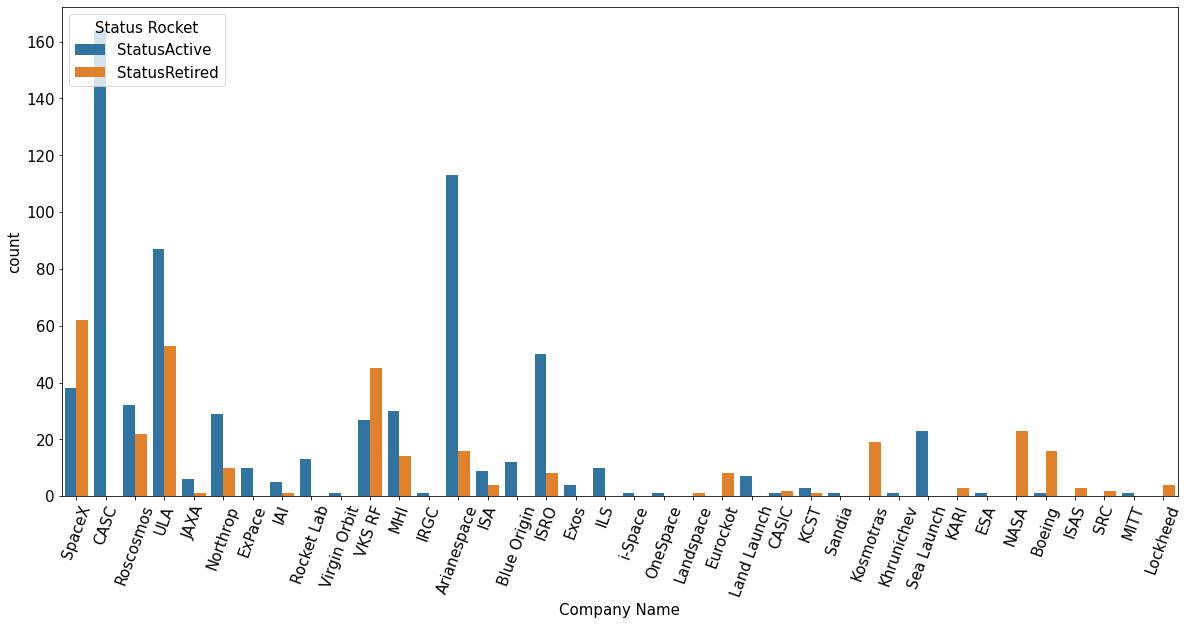

In [186]:
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=70)
sns.countplot(df['Company Name'][:1000],hue='Status Rocket',data=df)

## 5.3 Analyze Location of launch to success of mission

Now i show top 8 countries is rocket launching 

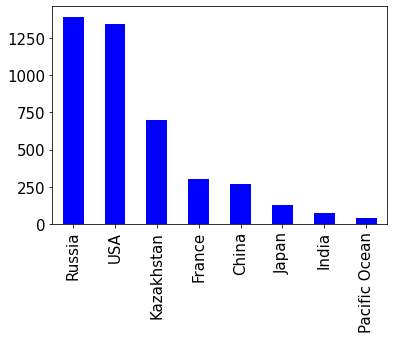

In [189]:
df['Country'].value_counts()[:8].plot(kind='bar',color='blue')

One the axes below you can see only successfull launches of different countries

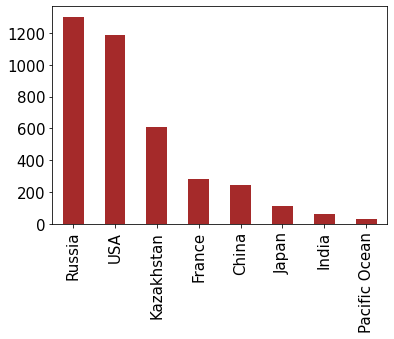

In [200]:

uspeh=df[df['Status Mission']=='Success']

uspeh['Country'].value_counts()[:8].plot(kind='bar',color='brown')


Another axes show us failed tries and we can notice that use have less launches but more fails

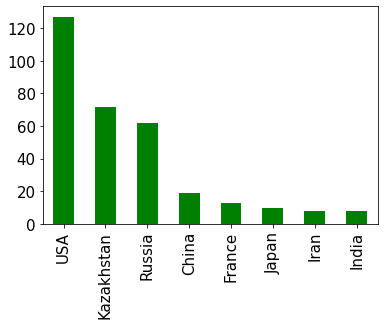

In [201]:
neuspeh=df[df['Status Mission']=='Failure']
neuspeh['Country'].value_counts()[:8].plot(kind='bar',color='green')